In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
zomato_df = pd.read_csv('zomato.csv', encoding='latin-1')
zomato_df.sample(5)

,Unnamed: 0.1,Unnamed: 0,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y
6023,6023,6023,18204494,King Bar & Restaurant,1,New Delhi,"7/7, Desh Bandhu Gupta Road, Paharganj, New Delhi",Paharganj,"Paharganj, New Delhi",77.212265,...,No,No,No,2,3.0,Orange,Average,10,India,India
3293,3293,3293,18395106,Kukkad Nukkad,1,New Delhi,"2515, Hudson Lane, Delhi University-GTB Nagar,...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204066,...,Yes,No,No,2,3.0,Orange,Average,12,India,India
2606,2606,2606,18354658,Punjabi Chaap Corner,1,New Delhi,"Shop 6, GF, Plot 2, NRI Colony, Alaknanda, New...",Alaknanda,"Alaknanda, New Delhi",77.254202,...,No,No,No,1,2.9,Orange,Average,4,India,India
61,61,61,7301700,Garota de Ipanema,30,Rio de Janeiro,"Avenida JoÃÂ­ÃÂ£o Alves, 56, Urca, Rio de Ja...",Urca,"Urca, Rio de Janeiro",-43.162667,...,No,No,No,3,4.3,Green,Very Good,10,Brazil,Brazil
2312,2312,2312,18356469,Prost Brew Pub,1,Hyderabad,"882/A Road No 45, Jubilee Hills, Hyderabad",Jubilee Hills,"Jubilee Hills, Hyderabad",78.400350,...,No,No,No,3,4.1,Green,Very Good,594,India,India


In [3]:
zomato_df.shape

(9551, 25)

In [4]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          9551 non-null   int64  
 1   Unnamed: 0            9551 non-null   int64  
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   Country Code          9551 non-null   int64  
 5   City                  9551 non-null   object 
 6   Address               9551 non-null   object 
 7   Locality              9551 non-null   object 
 8   Locality Verbose      9551 non-null   object 
 9   Longitude             9551 non-null   float64
 10  Latitude              9551 non-null   float64
 11  Cuisines              9542 non-null   object 
 12  Average Cost for two  9551 non-null   int64  
 13  Currency              9551 non-null   object 
 14  Has Table booking     9551 non-null   object 
 15  Has Online delivery  

In [5]:
zomato_df.describe()

,Unnamed: 0.1,Unnamed: 0,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,4775.000000,4775.000000,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,2757.280544,2757.280544,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,0.000000,0.000000,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,2387.500000,2387.500000,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,4775.000000,4775.000000,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,7162.500000,7162.500000,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,9550.000000,9550.000000,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [6]:
zomato_df.isna().sum()

Unnamed: 0.1            0
Unnamed: 0              0
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country_x               0
Country_y               0
dtype: int64

In [7]:
[features for features in zomato_df.columns if zomato_df[features].isna().sum() > 0]

['Cuisines']

In [8]:
zomato_df['Cuisines'].isna().sum()

9

<AxesSubplot:>

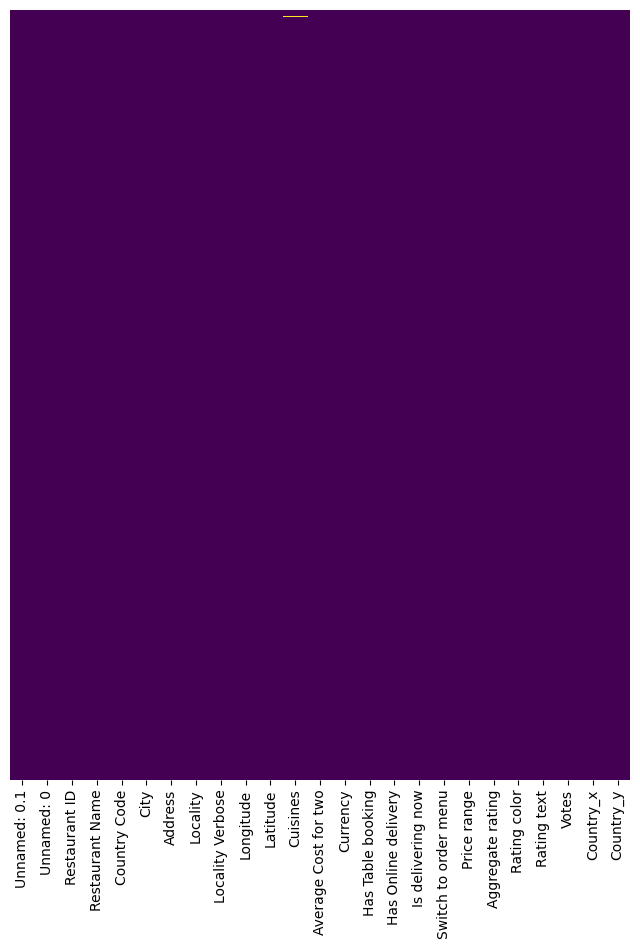

In [9]:
plt.figure(figsize=(8, 10))
sns.heatmap(zomato_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
zomato_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Restaurant ID', 'Restaurant Name',
       'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country_x', 'Country_y'],
      dtype='object')

In [11]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.sample(5)

,Country Code,Country
9,189,South Africa
11,208,Turkey
10,191,Sri Lanka
14,216,United States
1,14,Australia


In [12]:
final_df=pd.merge(zomato_df, df_country,on='Country Code', how='left')

In [13]:
final_df.head()

,Unnamed: 0.1,Unnamed: 0,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y,Country
0,0,0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,...,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Phillipines,Phillipines
1,1,1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,...,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Phillipines,Phillipines
2,2,2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,...,No,No,4,4.4,Green,Very Good,270,Phillipines,Phillipines,Phillipines
3,3,3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,...,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,Phillipines,Phillipines
4,4,4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,...,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,Phillipines,Phillipines


In [14]:
final_df.dtypes

Unnamed: 0.1              int64
Unnamed: 0                int64
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country_x                object
Country_y                object
Country                  object
dtype: object

# Pie Chart- Top 3 countries that uses zomato

In [15]:
country_names = final_df['Country'].value_counts().index
country_val = final_df['Country'].value_counts().values

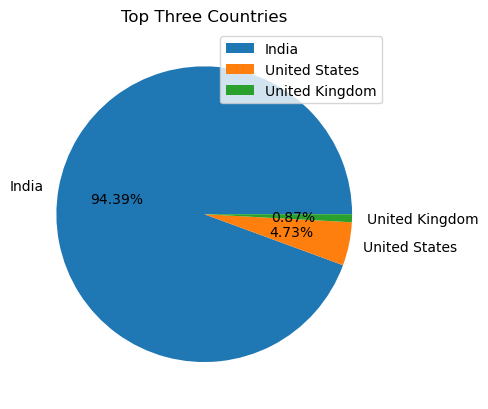

In [16]:
plt.title('Top Three Countries')
plt.pie(country_val[:3], labels=country_names[:3], autopct='%1.2f%%')
plt.plot()
plt.legend(loc='best')

Observation: Zomato maximum records or transaction are from India After that USA and then United Kingdoms

In [17]:
final_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Restaurant ID', 'Restaurant Name',
       'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country_x', 'Country_y',
       'Country'],
      dtype='object')

In [18]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [19]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

[]

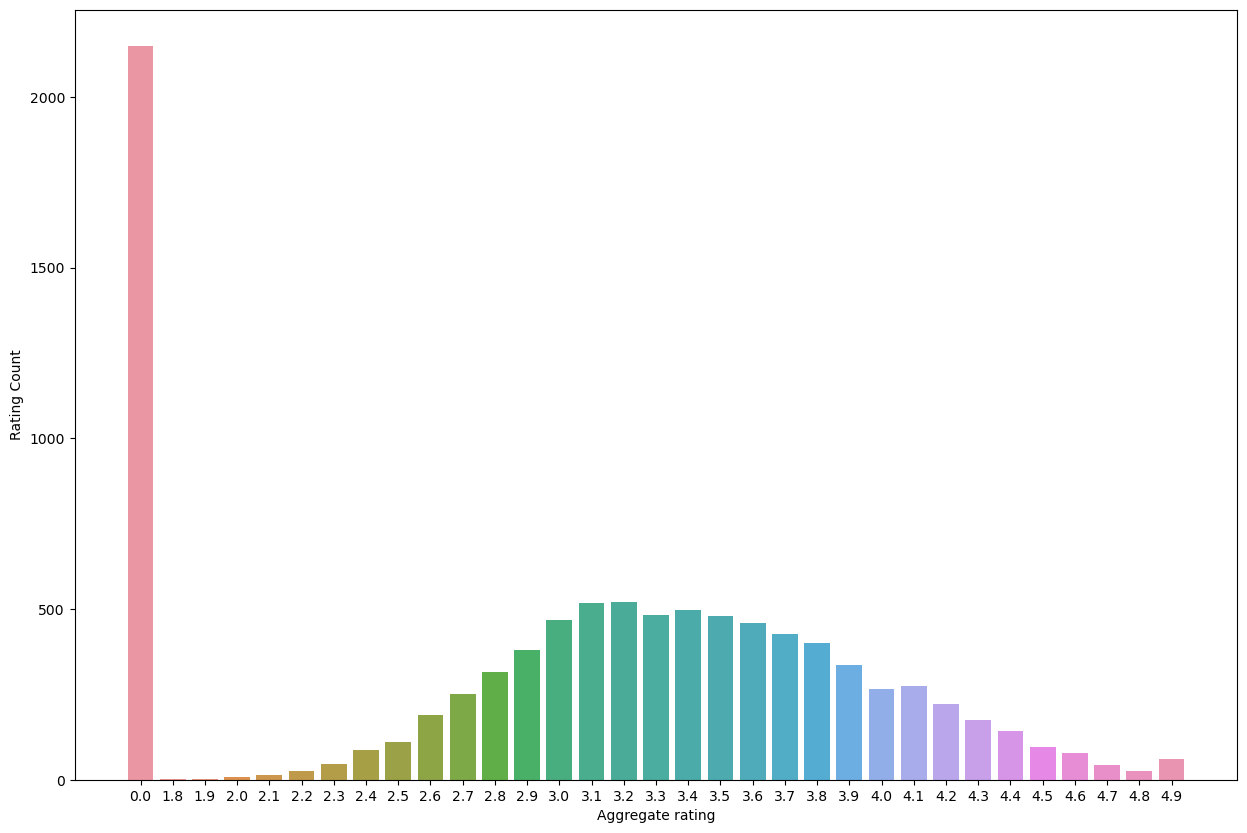

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x=ratings['Aggregate rating'], y=ratings['Rating Count'])
plt.plot()

[]

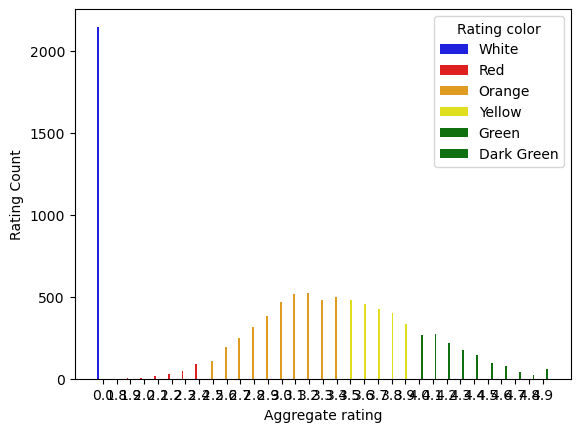

In [21]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])
plt.plot()

Observation:

Not Rated count is very high
Maximum number of rating are between 2.5 to 3.4

# Count plot

<AxesSubplot:xlabel='Rating color', ylabel='count'>

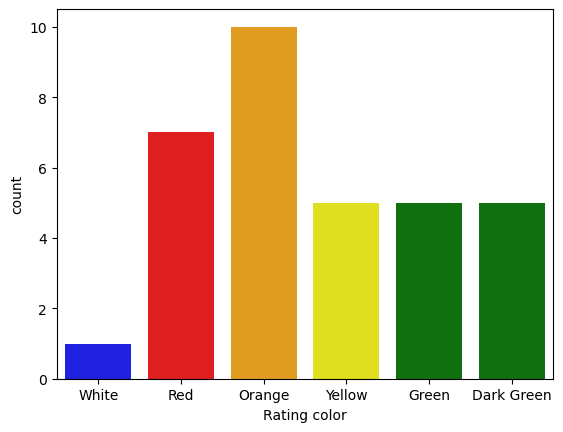

In [22]:
sns.countplot(x=ratings['Rating color'], palette=['blue','red','orange','yellow','green','green'])

In [23]:
## Find the countries name that has given 0 rating 
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [24]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observations Maximum number of 0 ratings are from Indian customers

In [25]:
##find out which currency is used by which country?
final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [26]:
# Which Countries do have online deliveries option
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [27]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observations:
Online Deliveries are available in India and UAE

In [28]:
## Create a pie chart for top 5 cities distribution
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

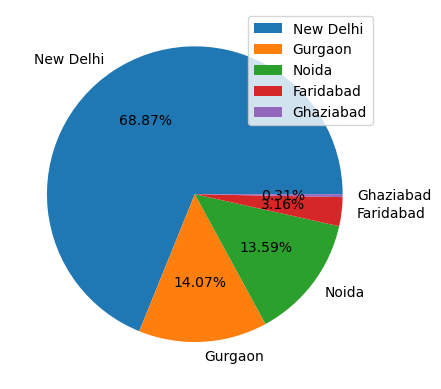

In [29]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.plot()
plt.legend()

In [30]:
final_df['Cuisines'].value_counts().head()

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

In [31]:
#top ten cuisines by votes

data = final_df.sort_values('Votes', ascending=False)
data[['Cuisines', 'Votes']].reset_index()[:10]

,index,Cuisines,Votes
0,728,"Italian, American, Pizza",10934
1,735,"American, Burger, Cafe",9667
2,3994,"Continental, American, Asian, North Indian",7931
3,2412,"Continental, North Indian",7574
4,739,"European, Mediterranean, North Indian",6907
5,2414,"North Indian, Chinese",5966
6,743,"Finger Food, North Indian, Italian, Continenta...",5705
7,2307,"European, Mediterranean, North Indian",5434
8,736,"North Indian, European, Mediterranean",5385
9,2411,"Chinese, North Indian",5288
